Basic tutorial - https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing#scrollTo=S9qDqEHddgKq

Best practices - https://colab.research.google.com/drive/1BoQ_vakEVtojsd2x_U6-_x52OOuqruj2?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import time
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import emoji
import Preprocessing_topicM as preproc
import nltk
import warnings
warnings.filterwarnings("ignore")

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno 11001] getaddrinfo failed>
[nltk_data] Error loading averaged_perceptron_tagger_eng: <urlopen
[nltk_data]     error [Errno 11001] getaddrinfo failed>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [2]:
reviews_raw = pd.read_csv(r"../data_hyderabad/10k_reviews.csv")

In [3]:
reviews_data = reviews_raw[reviews_raw["Rating"].notna() & reviews_raw["Review"].notna()]
reviews_data.isna().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [4]:
# split UPPERCASE WORDS
def splitting_words_process(word):
    # only upper case letters
    if word.isupper():
        return word

    # more than one upper case letter inside
    elif re.search(r'[A-Z][a-z]*[A-Z]', word):
        split_word = re.findall(r'[A-Z][a-z]*', word)
        return ' '.join(split_word)

    # <2 upper case letters
    else:
        return word

reviews_data['Review'] = reviews_data['Review'].apply(lambda x: ' '.join([splitting_words_process(word) for word in x.split()]))

In [5]:
# Function to replace 'gud', 'goo', 'gd' with the appropriate 'good'
def replace_gud_with_good(text):
    if isinstance(text, str):
        # Define the regex pattern to match 'gud', 'goo', 'gd' in various capitalizations
        pattern = re.compile(r'\b([Gg][Uu][Dd]|[Gg][Oo][Oo]|[Gg][Dd])\b')

        # Replacement function to check the case of the first letter
        def replacement(match):
            word = match.group()
            # Check if the first letter is uppercase, then return 'Good', else 'good'
            if word[0].isupper():
                return 'Good'
            else:
                return 'good'

        # Use re.sub to apply the replacement function
        return pattern.sub(replacement, text)

    return text

# Apply the function to the 'Review' column to replace the variants of 'good'
reviews_data['Review'] = reviews_data['Review'].apply(replace_gud_with_good)

In [6]:
# Function to replace 'kk', 'Oke', 'k', 'Ok' with 'ok'
def replace_to_ok(text):
    if isinstance(text, str):
        # Define the regex pattern to match the variants of 'ok'
        pattern = re.compile(r'\b(k|kk|Ok|Oke)\b', re.IGNORECASE)

        # Replacement function to return 'ok' for all matched words
        def replacement(match):
            return 'ok'

        # Use re.sub to apply the replacement function
        return pattern.sub(replacement, text)

    return text

# Apply the function to the 'Review' column to replace the variants of 'ok'
reviews_data['Review'] = reviews_data['Review'].apply(replace_to_ok)

In [7]:
# add space after ! | " | # | $ | % | & | ( | ) | * | + | , | . | : | ; followed immediately by a word
def add_space_after_punctuation(df):

    df['Review'] = df['Review'].apply(lambda text: re.sub(r'([\u0021-\u0026\u0028-\u002C\u002E\u003A-\u003F]+(?=\w))', r'\1 ', text) if isinstance(text, str) else text)
    return df

# Example usage:
reviews_data = add_space_after_punctuation(reviews_data)

In [8]:
# remove gibberish words like "ggggggggggd", "eshjdgue"
def remove_gibberish(text):
    cleaned_text = re.sub(r'\b\w{15,}\b', '', text)  # removes 15+ words
    cleaned_text = re.sub(r'\b\w*(\w)\1{2,}\w*\b', '', cleaned_text)  # removes words that contain 3+ repeating letters

    return cleaned_text

reviews_data['Review'] = reviews_data['Review'].apply(remove_gibberish)

In [9]:
def remove_space_before_punctuation(text):
    if isinstance(text, str):
        # Define the regex pattern to match spaces before punctuation
        pattern = re.compile(r'\s+([?.!,;:])')

        # Use re.sub to remove spaces before punctuation
        return pattern.sub(r'\1', text)

    return text

# Apply the function to the 'Review' column to remove spaces before punctuation
reviews_data['Review'] = reviews_data['Review'].apply(remove_space_before_punctuation)

In [10]:
reviews_preproc = reviews_data['Review'].apply(lambda x: preproc.main_pipeline(
    x,
    print_output=False,
    no_stopwords=False,
    custom_stopwords=[],
    convert_diacritics=True,
    no_punctuation=False,
    remove_contractions = True,
    lowercase=False,
    lemmatized=False,
    stemmed=False,
    tokenized_output=False
))

In [11]:
def remove_space_before_punctuation(text):
    if isinstance(text, str):
        # Define the regex pattern to match spaces before punctuation
        pattern = re.compile(r'\s+([?.!,;:])')

        # Use re.sub to remove spaces before punctuation
        return pattern.sub(r'\1', text)

    return text

# Apply the function to the 'Review' column to remove spaces before punctuation
reviews_preproc = reviews_preproc.apply(remove_space_before_punctuation)

In [12]:
reviews_preproc = reviews_preproc[reviews_preproc.apply(lambda x: len(x) >= 3 if isinstance(x, str) else False)]

In [13]:
len(reviews_preproc)

9910

In [14]:
print(reviews_preproc)

0       The ambience was good, food was quite good. ha...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good. we ordered Kodi drumsticks and b...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 9910, dtype: object


In [15]:
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired, MaximalMarginalRelevance, PartOfSpeech
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from umap import UMAP
from hdbscan import HDBSCAN

In [16]:
from sentence_transformers import SentenceTransformer

# Pre-calculate embeddings
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(reviews_preproc.tolist(), show_progress_bar=True)

Batches:   0%|          | 0/310 [00:00<?, ?it/s]

In [26]:
vectorizer_model = CountVectorizer(stop_words="english", ngram_range=(1, 1))
ctfidf_model = ClassTfidfTransformer()
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size=30,metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [27]:
model_base = BERTopic(
    language="english",
    calculate_probabilities=True,
    embedding_model= embedding_model,
    vectorizer_model=vectorizer_model,
    ctfidf_model=ctfidf_model,
    umap_model= umap_model,
    hdbscan_model=hdbscan_model,
    representation_model={"MMR": MaximalMarginalRelevance(diversity=0.3),
                          "KeyBert": KeyBERTInspired(),
                          "Pos": PartOfSpeech()},
    verbose = True
)
topics_base, probs_base = model_base.fit_transform(reviews_preproc,embeddings)

2024-12-17 20:20:45,214 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-17 20:21:34,967 - BERTopic - Dimensionality - Completed ✓
2024-12-17 20:21:34,971 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-12-17 20:21:38,794 - BERTopic - Cluster - Completed ✓
2024-12-17 20:21:38,806 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-12-17 20:22:09,505 - BERTopic - Representation - Completed ✓


In [25]:
model_base.get_topic_info()

,Topic,Count,Name,Representation,MMR,KeyBert,Pos,Representative_Docs
0,-1,4003,-1_food_good_place_service,"[food, good, place, service, ambience, great, ...","[food, service, ambience, chicken, experience,...","[restaurant, food, dinner, buffet, dishes, lun...","[food, good, place, service, ambience, great, ...",[It is during this time of the year where the ...
1,0,611,0_biryani_chicken_biriyani_mutton,"[biryani, chicken, biriyani, mutton, ordered, ...","[biryani, chicken, biriyani, mutton, rice, res...","[biryani, biryanis, biriyani, briyani, raita, ...","[biryani, chicken, biriyani, mutton, taste, go...","[Biryani was not at all good, worst experience..."
2,1,482,1_manager_asked_service_table,"[manager, asked, service, table, rude, worst, ...","[manager, service, table, rude, staff, waiter,...","[restaurant, waiters, customers, waiter, servi...","[manager, service, table, rude, worst, bad, st...",[I went to club rouge since the day it started...
3,2,308,2_good_bhehave_verry_combo,"[good, bhehave, verry, combo, nice, , , , , ]","[good, bhehave, verry, combo, nice, , , , , , ...","[good, nice, , , , , , , , ]","[good, combo, nice, , , , , , , ]","[Good, good, Good]"
4,3,301,3_dance_dj_floor_music,"[dance, dj, floor, music, hangout, place, frie...","[dance, dj, hangout, place, drinks, rooftop, p...","[pubs, hangout, terrace, pub, rooftop, hangout...","[dance, dj, floor, music, place, friends, drin...",[This place is awesome to hangout with friends...
...,...,...,...,...,...,...,...,...
66,65,24,65_goa_goan_sea_fisherman,"[goa, goan, sea, fisherman, hyderabad, seafood...","[goa, goan, hyderabad, seafood, wharf, panjim,...","[goa, goan, restaurant, hyderabad, seafood, di...","[goa, goan, sea, fisherman, hyderabad, seafood...","[Good breezy sitting, great food, friendly the..."
67,66,23,66_zega_barnali_hostess_welcome,"[zega, barnali, hostess, welcome, warm, excell...","[zega, barnali, hostess, welcome, warm, dining...","[zega, festival, visit, gyoza, dining, hostess...","[barnali, hostess, welcome, warm, excellent, d...",[This place is one best place for fine dining ...
68,67,22,67_time_vey_ontime_timings,"[time, vey, ontime, timings, timing, right, de...","[time, vey, ontime, timings, timing, deli, per...","[time, ontime, timing, timings, better, great,...","[time, ontime, timings, timing, deli, manageme...","[Before the time, well before time, On time]"
69,68,20,68_ipl_praveen_gaming_watch,"[ipl, praveen, gaming, watch, stadium, sports,...","[ipl, gaming, stadium, sports, wings, prabhu, ...","[ipl, streaming, bpl, cricket, stadium, watchi...","[ipl, gaming, stadium, sports, wings, prabhu, ...","[Good experience, nice ambience and amazing st..."


In [279]:
# Create a DataFrame with reviews and their top 3 assigned topics with probabilities
reviews_with_topics = pd.DataFrame({
    'Review': reviews_preproc,
    'Top_3_Topics': [np.argsort(probs_base[i])[-3:][::-1] for i in range(len(reviews_preproc))],
    'Top_3_Probabilities': [np.round(np.sort(probs_base[i])[-3:][::-1] * 100, 2) for i in range(len(reviews_preproc))]
})

# Map the topic IDs to their custom names from topic_aspects_["MMR"]
topic_info_MMR = {topic: " | ".join(list(zip(*values))[0][:1]) for topic, values in model_base.topic_aspects_["MMR"].items()}
topic_info_KB = {topic: " | ".join(list(zip(*values))[0][:1]) for topic, values in model_base.topic_aspects_["KeyBert"].items()}
topic_info_POS = {topic: " | ".join(list(zip(*values))[0][:1]) for topic, values in model_base.topic_aspects_["Pos"].items()}
reviews_with_topics['Topics_MMR'] = reviews_with_topics['Top_3_Topics'].apply(lambda topics: [topic_info_MMR[topic] for topic in topics])
reviews_with_topics['Topics_KB'] = reviews_with_topics['Top_3_Topics'].apply(lambda topics: [topic_info_KB[topic] for topic in topics])
reviews_with_topics['Topics_POS'] = reviews_with_topics['Top_3_Topics'].apply(lambda topics: [topic_info_POS[topic] for topic in topics])

# Display the first few rows of the new DataFrame
reviews_with_topics


,Review,Top_3_Topics,Top_3_Probabilities,Topics_MMR,Topics_KB,Topics_POS
0,"The ambience was good, food was quite good. ha...","[48, 27, 9]","[5.56, 4.58, 3.97]","[hospitality, place, ambience]","[restaurant, restaurant, ambience]","[thanks, place, ambience]"
1,Ambience is too good for a pleasant evening. S...,"[9, 27, 3]","[42.66, 3.69, 2.02]","[ambience, place, dance]","[ambience, restaurant, hangout]","[ambience, place, dance]"
2,A must try.. great food great ambience. Thnx f...,"[9, 27, 20]","[9.95, 5.59, 2.78]","[ambience, place, pasta]","[ambience, restaurant, pizza]","[ambience, place, pasta]"
3,Soumen das and Arun was a great guy. Only beca...,"[7, 48, 27]","[23.59, 4.18, 2.5]","[service, hospitality, place]","[bahadur, restaurant, restaurant]","[excellent, thanks, place]"
4,Food is good. we ordered Kodi drumsticks and b...,"[18, 12, 6]","[3.18, 3.08, 3.08]","[veg, chicken, buffet]","[restaurant, buffet, buffets]","[veg, chicken, buffet]"
...,...,...,...,...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,"[12, 18, 51]","[26.99, 3.6, 3.02]","[chicken, veg, andhra]","[buffet, restaurant, andhra]","[chicken, veg, andhra]"
9996,This place has never disappointed us.. The foo...,"[11, 13, 12]","[48.24, 2.24, 1.63]","[chinese, noodles, chicken]","[chinese, noodles, buffet]","[chinese, noodles, chicken]"
9997,"Bad rating is mainly because of ""Chicken Bone ...","[11, 13, 12]","[3.14, 2.98, 1.31]","[chinese, noodles, chicken]","[chinese, noodles, buffet]","[chinese, noodles, chicken]"
9998,I personally love and prefer Chinese Food. Had...,"[11, 13, 12]","[66.59, 1.6, 1.18]","[chinese, noodles, chicken]","[chinese, noodles, buffet]","[chinese, noodles, chicken]"


In [280]:
hierarchical_topics = model_base.hierarchical_topics(reviews_preproc)

100%|██████████| 53/53 [00:00<00:00, 275.33it/s]


In [281]:
model_base.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [282]:
len(model_base.get_topics())

55

In [283]:
model_reduced = model_base.reduce_topics(reviews_preproc, nr_topics=10)

2024-12-15 22:11:32,383 - BERTopic - Topic reduction - Reducing number of topics
2024-12-15 22:11:34,939 - BERTopic - Topic reduction - Reduced number of topics from 55 to 10


In [284]:
topics_reduced = model_reduced.topics_
probs_reduced = model_reduced.probabilities_

In [ ]:
# Create a DataFrame with reviews and their top 3 assigned topics with probabilities
reviews_with_topics_merged = pd.DataFrame({
    'Review': reviews_preproc,
    'Top_3_Topics': [np.argsort(probs_reduced[i])[-3:][::-1] for i in range(len(reviews_preproc))],
    'Top_3_Probabilities': [np.round(np.sort(probs_reduced[i])[-3:][::-1] * 100, 2) for i in range(len(reviews_preproc))]
})

# Map the topic IDs to their custom names from topic_aspects_["MMR"]
topic_info_MMR_merged = {topic: " | ".join(list(zip(*values))[0][:1]) for topic, values in model_reduced.topic_aspects_["MMR"].items()}
topic_info_KB_merged = {topic: " | ".join(list(zip(*values))[0][:1]) for topic, values in model_reduced.topic_aspects_["KeyBert"].items()}
topic_info_POS_merged = {topic: " | ".join(list(zip(*values))[0][:1]) for topic, values in model_reduced.topic_aspects_["Pos"].items()}
reviews_with_topics_merged['Topics_MMR'] = reviews_with_topics_merged['Top_3_Topics'].apply(lambda topics: [topic_info_MMR_merged[topic] for topic in topics])
reviews_with_topics_merged['Topics_KB'] = reviews_with_topics_merged['Top_3_Topics'].apply(lambda topics: [topic_info_KB_merged[topic] for topic in topics])
reviews_with_topics_merged['Topics_POS'] = reviews_with_topics_merged['Top_3_Topics'].apply(lambda topics: [topic_info_POS_merged[topic] for topic in topics])

# Display the first few rows of the new DataFrame
reviews_with_topics_merged

,Review,Top_3_Topics,Top_3_Probabilities,Topics_MMR,Topics_KB,Topics_POS
0,"The ambience was good, food was quite good. ha...","[0, 3, 4]","[46.63, 5.61, 4.28]","[place, momos, chocolate]","[biryani, momos, cakes]","[good, burger, cake]"
1,Ambience is too good for a pleasant evening. S...,"[0, 3, 4]","[71.33, 4.18, 3.38]","[place, momos, chocolate]","[biryani, momos, cakes]","[good, burger, cake]"
2,A must try.. great food great ambience. Thnx f...,"[0, 3, 4]","[47.78, 5.18, 4.47]","[place, momos, chocolate]","[biryani, momos, cakes]","[good, burger, cake]"
3,Soumen das and Arun was a great guy. Only beca...,"[0, 3, 4]","[53.72, 4.84, 3.43]","[place, momos, chocolate]","[biryani, momos, cakes]","[good, burger, cake]"
4,Food is good. we ordered Kodi drumsticks and b...,"[0, 3, 4]","[42.61, 7.38, 4.32]","[place, momos, chocolate]","[biryani, momos, cakes]","[good, burger, cake]"
...,...,...,...,...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,"[0, 3, 4]","[70.07, 9.94, 4.18]","[place, momos, chocolate]","[biryani, momos, cakes]","[good, burger, cake]"
9996,This place has never disappointed us.. The foo...,"[0, 3, 4]","[69.19, 5.79, 2.23]","[place, momos, chocolate]","[biryani, momos, cakes]","[good, burger, cake]"
9997,"Bad rating is mainly because of ""Chicken Bone ...","[0, 3, 4]","[20.2, 4.89, 1.64]","[place, momos, chocolate]","[biryani, momos, cakes]","[good, burger, cake]"
9998,I personally love and prefer Chinese Food. Had...,"[0, 3, 4]","[82.19, 4.32, 1.68]","[place, momos, chocolate]","[biryani, momos, cakes]","[good, burger, cake]"


In [234]:
model_custom_merged= BERTopic(
    language="english",
    calculate_probabilities=True,
    embedding_model= embedding_model,
    vectorizer_model=vectorizer_model,
    ctfidf_model=ctfidf_model,
    umap_model= umap_model,
    hdbscan_model=hdbscan_model,
    representation_model={"MMR": MaximalMarginalRelevance(diversity=0.3),
                          "KeyBert": KeyBERTInspired(),
                          "Pos": PartOfSpeech()},
    verbose = True
)
topics_custom, probs_custom = model_custom_merged.fit_transform(reviews_preproc,embeddings)

2024-12-15 21:45:52,035 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-15 21:46:28,965 - BERTopic - Dimensionality - Completed ✓
2024-12-15 21:46:28,967 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-12-15 21:46:31,119 - BERTopic - Cluster - Completed ✓
2024-12-15 21:46:31,127 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-12-15 21:46:45,829 - BERTopic - Representation - Completed ✓


In [235]:
hierarchical_topics = model_custom_merged.hierarchical_topics(reviews_preproc)

100%|██████████| 53/53 [00:00<00:00, 256.11it/s]


In [236]:
model_custom_merged.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [237]:
model_custom_merged.merge_topics(reviews_preproc, topics_to_merge=[[41,42,2],[53,3],[29,2,7],[32,17,47],[34,37],[53,3],[4,10],[25,22,28,26]])

In [238]:
len(model_custom_merged.get_topic_info())

44

In [239]:
model_custom_merged.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [240]:
model_custom_merged.merge_topics(reviews_preproc, topics_to_merge=[[25,11,4], [26,8],[18,16],[38,6],[0,41]])

In [241]:
len(model_custom_merged.get_topic_info())

38

In [242]:
model_custom_merged.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [243]:
model_custom_merged.merge_topics(reviews_preproc, topics_to_merge=[[20,27],[7,26,16], [12,15],[24,36,31,27,32],[8,23]])

In [249]:
len(model_custom_merged.get_topic_info())

27

In [245]:
model_custom_merged.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [246]:
model_custom_merged.get_topic_info()

,Topic,Count,Name,Representation,MMR,KeyBert,Pos,Representative_Docs
0,-1,4328,-1_food_good_place_service,"[food, good, place, service, chicken, ambience...","[food, service, chicken, ambience, experience,...","[restaurant, buffet, lunch, food, dinner, dish...","[food, good, place, service, chicken, ambience...",[Visited the place on sunday and the place was...
1,0,601,0_biryani_chicken_taste_ordered,"[biryani, chicken, taste, ordered, mutton, bir...","[biryani, chicken, mutton, biriyani, rice, res...","[biryani, biryanis, biriyani, briyani, raita, ...","[biryani, chicken, taste, mutton, biriyani, go...","[Biryani was not at all good, worst experience..."
2,1,551,1_place_ambience_music_good,"[place, ambience, music, good, dj, dance, floo...","[place, ambience, dj, hangout, drinks, party, ...","[hangout, pub, place, visit, ambience, cocktai...","[place, ambience, music, good, dj, dance, floo...",[Being close to my house SLN Terminus is one p...
3,2,420,2_service_manager_asked_table,"[service, manager, asked, table, food, worst, ...","[manager, table, worst, staff, rude, waiter, r...","[restaurant, waiters, serving, serve, buffet, ...","[service, manager, table, food, worst, bad, st...",[After hearing a lot about this place I got a ...
4,3,403,3_excellent_service_good_food,"[excellent, service, good, food, nice, thank, ...","[service, tasty, bahadur, shivam, govind, visi...","[service, served, services, fantastic, excelle...","[excellent, service, good, food, nice, thank, ...","[excellent service, excellent service, very ve..."
5,4,402,4_good_nice_boy_rider,"[good, nice, boy, rider, bhehave, tast, verry,...","[rider, bhehave, tast, verry, guy, combo, fast...","[good, great, nice, , , , , , , ]","[good, nice, boy, rider, tast, guy, combo, fas...","[good, good, good]"
6,5,396,5_hyderabad_gachibowli_place_best,"[hyderabad, gachibowli, place, best, food, hyd...","[hyderabad, gachibowli, food, hyderabadi, visi...","[hyderabad, hyderabadi, restaurants, visit, re...","[hyderabad, gachibowli, place, best, food, hyd...",[Best place in gachibowli. One of the best Roo...
7,6,275,6_paneer_punjabi_paratha_indian,"[paneer, punjabi, paratha, indian, north, para...","[paneer, punjabi, parathas, food, masala, chut...","[punjabi, punjab, paneer, paratha, parathas, t...","[paneer, punjabi, paratha, indian, north, para...",[Awesome North Indian punjabi food served here...
8,7,260,7_quantity_taste_quality_bad,"[quantity, taste, quality, bad, food, waste, p...","[quantity, taste, quality, food, overpriced, p...","[quantity, quality, portions, food, value, imp...","[quantity, taste, quality, bad, food, price, g...","[quantity less but quality good, Food is not t..."
9,8,252,8_delivery_fast_order_time,"[delivery, fast, order, time, boy, delivered, ...","[delivery, delivered, received, deliver, man, ...","[delivery, deliver, delivered, deliverd, excel...","[delivery, fast, order, time, boy, guy, delive...","[Very good delivery, good delivery, Good Deliv..."


In [247]:
model_custom_merged.merge_topics(reviews_preproc, topics_to_merge=[[3,2], [4,8],[12,14]])

In [250]:
model_custom_merged.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [251]:
model_custom_merged.merge_topics(reviews_preproc, topics_to_merge=[[16,23,21,25], [4,3]])

In [252]:
model_custom_merged.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [256]:
model_custom_merged.merge_topics(reviews_preproc, topics_to_merge=[[9,10,18], [16,20]])

In [265]:
model_custom_merged.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [257]:
topics_custom = model_custom_merged.topics_
probs_custom = model_custom_merged.probabilities_

In [22]:
# Create a DataFrame with reviews and their top 3 assigned topics with probabilities
reviews_with_topics_custom = pd.DataFrame({
    'Review': reviews_preproc,
    'Top_3_Topics': [np.argsort(probs_custom[i])[-3:][::-1] for i in range(len(reviews_preproc))],
    'Top_3_Probabilities': [np.round(np.sort(probs_custom[i])[-3:][::-1] * 100, 2) for i in range(len(reviews_preproc))]
})

# Map the topic IDs to their custom names from topic_aspects_["MMR"]
topic_info_MMR_custom = {topic: " | ".join(list(zip(*values))[0][:3]) for topic, values in model_custom_merged.topic_aspects_["MMR"].items()}
topic_info_KB_custom = {topic: " | ".join(list(zip(*values))[0][:3]) for topic, values in model_custom_merged.topic_aspects_["KeyBert"].items()}
topic_info_POS_custom = {topic: " | ".join(list(zip(*values))[0][:3]) for topic, values in model_custom_merged.topic_aspects_["Pos"].items()}
reviews_with_topics_custom['Topics_MMR'] = reviews_with_topics_custom['Top_3_Topics'].apply(lambda topics: [topic_info_MMR_custom[topic] for topic in topics])
reviews_with_topics_custom['Topics_KB'] = reviews_with_topics_custom['Top_3_Topics'].apply(lambda topics: [topic_info_KB_custom[topic] for topic in topics])
reviews_with_topics_custom['Topics_POS'] = reviews_with_topics_custom['Top_3_Topics'].apply(lambda topics: [topic_info_POS_custom[topic] for topic in topics])

# Display the first few rows of the new DataFrame
reviews_with_topics_custom

NameError: name 'model_custom_merged' is not defined

In [264]:
len(model_custom_merged.get_topic_info())

20

In [261]:
model_custom_merged.get_topic_info()

,Topic,Count,Name,Representation,MMR,KeyBert,Pos,Representative_Docs
0,-1,4328,-1_food_good_place_service,"[food, good, place, service, chicken, ambience...","[food, service, chicken, ambience, experience,...","[restaurant, buffet, dishes, food, lunch, dinn...","[food, good, place, service, chicken, ambience...",[The food was awesome and as was the ambience....
1,0,947,0_place_food_good_ambience,"[place, food, good, ambience, hyderabad, music...","[place, ambience, hyderabad, dj, gachibowli, v...","[hyderabad, hyderabadi, restaurant, place, pub...","[place, food, good, ambience, hyderabad, music...",[One of my favourite place in Hyderabad Good ...
2,1,823,1_service_food_staff_manager,"[service, food, staff, manager, good, experien...","[service, staff, manager, experience, table, r...","[service, served, customer, customers, serving...","[service, food, staff, manager, good, experien...","[service is good, Good service, As the name su..."
3,2,654,2_delivery_good_nice_fast,"[delivery, good, nice, fast, order, time, boy,...","[delivery, delivered, received, deliver, man, ...","[delivery, deliver, delivered, excellent, good...","[delivery, good, nice, fast, order, time, boy,...","[good delivery, good delivery, Good delivery]"
4,3,601,3_biryani_chicken_taste_ordered,"[biryani, chicken, taste, ordered, good, mutto...","[biryani, chicken, mutton, biriyani, rice, res...","[biryani, biryanis, biriyani, briyani, mutton,...","[biryani, chicken, taste, good, mutton, biriya...",[Paradise Biryani is really good service also ...
5,4,465,4_cake_cream_chocolate_ice,"[cake, cream, chocolate, ice, donuts, shake, c...","[chocolate, donuts, shake, cakes, brownies, co...","[flavors, chocolate, flavours, bakery, donuts,...","[cake, cream, chocolate, ice, donuts, cakes, p...",[This is a small ice cream parlour. It has all...
6,5,299,5_buffet_chicken_veg_good,"[buffet, chicken, veg, good, fish, starters, m...","[buffet, chicken, food, lunch, soup, paneer, t...","[buffet, restaurant, dishes, lunch, dish, dinn...","[buffet, chicken, veg, good, fish, starters, m...",[Recently we were invited for a food tasting s...
7,6,275,6_paneer_punjabi_paratha_indian,"[paneer, punjabi, paratha, indian, north, para...","[paneer, punjabi, paratha, food, masala, chutn...","[punjabi, punjab, paneer, restaurant, meal, hy...","[paneer, punjabi, paratha, indian, north, para...",[Awesome North Indian punjabi food served here...
8,7,260,7_quantity_taste_quality_food,"[quantity, taste, quality, food, bad, good, wa...","[quantity, taste, quality, food, bad, poor, sa...","[quantity, quality, portions, food, taste, val...","[quantity, taste, quality, food, bad, good, pr...","[quantity less but quality good, very less qua..."
9,8,239,8_chinese_noodles_rice_fried,"[chinese, noodles, rice, fried, manchurian, fo...","[chinese, noodles, rice, manchurian, ordered, ...","[cuisine, noodles, rice, restaurant, dishes, c...","[chinese, noodles, rice, fried, manchurian, fo...",[As soon you enter the restaurant you get an a...


In [274]:
reviews_with_topics_custom.to_csv('reviews_with_topics_final_extended.csv', index=False)

In [268]:
import pickle

# Save the model
model_custom_merged.save("custom_merged_model")

# Save topics and probs
with open("topics_probs.pkl", "wb") as f:
    pickle.dump((topics_custom, probs_custom), f)

2024-12-15 22:01:12,557 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [ ]:
# Load the model
from bertopic import BERTopic

custom_merged_model = BERTopic.load("custom_merged_model")

# Load topics and probs
with open("topics_probs.pkl", "rb") as f:
    topics_custom, probs_custom = pickle.load(f)

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [271]:
custom_merged_model.get_topic_info()

,Topic,Count,Name,Representation,MMR,KeyBert,Pos,Representative_Docs
0,-1,4328,-1_food_good_place_service,"[food, good, place, service, chicken, ambience...","[food, service, chicken, ambience, experience,...","[restaurant, buffet, dishes, food, lunch, dinn...","[food, good, place, service, chicken, ambience...",[The food was awesome and as was the ambience....
1,0,947,0_place_food_good_ambience,"[place, food, good, ambience, hyderabad, music...","[place, ambience, hyderabad, dj, gachibowli, v...","[hyderabad, hyderabadi, restaurant, place, pub...","[place, food, good, ambience, hyderabad, music...",[One of my favourite place in Hyderabad Good ...
2,1,823,1_service_food_staff_manager,"[service, food, staff, manager, good, experien...","[service, staff, manager, experience, table, r...","[service, served, customer, customers, serving...","[service, food, staff, manager, good, experien...","[service is good, Good service, As the name su..."
3,2,654,2_delivery_good_nice_fast,"[delivery, good, nice, fast, order, time, boy,...","[delivery, delivered, received, deliver, man, ...","[delivery, deliver, delivered, excellent, good...","[delivery, good, nice, fast, order, time, boy,...","[good delivery, good delivery, Good delivery]"
4,3,601,3_biryani_chicken_taste_ordered,"[biryani, chicken, taste, ordered, good, mutto...","[biryani, chicken, mutton, biriyani, rice, res...","[biryani, biryanis, biriyani, briyani, mutton,...","[biryani, chicken, taste, good, mutton, biriya...",[Paradise Biryani is really good service also ...
5,4,465,4_cake_cream_chocolate_ice,"[cake, cream, chocolate, ice, donuts, shake, c...","[chocolate, donuts, shake, cakes, brownies, co...","[flavors, chocolate, flavours, bakery, donuts,...","[cake, cream, chocolate, ice, donuts, cakes, p...",[This is a small ice cream parlour. It has all...
6,5,299,5_buffet_chicken_veg_good,"[buffet, chicken, veg, good, fish, starters, m...","[buffet, chicken, food, lunch, soup, paneer, t...","[buffet, restaurant, dishes, lunch, dish, dinn...","[buffet, chicken, veg, good, fish, starters, m...",[Recently we were invited for a food tasting s...
7,6,275,6_paneer_punjabi_paratha_indian,"[paneer, punjabi, paratha, indian, north, para...","[paneer, punjabi, paratha, food, masala, chutn...","[punjabi, punjab, paneer, restaurant, meal, hy...","[paneer, punjabi, paratha, indian, north, para...",[Awesome North Indian punjabi food served here...
8,7,260,7_quantity_taste_quality_food,"[quantity, taste, quality, food, bad, good, wa...","[quantity, taste, quality, food, bad, poor, sa...","[quantity, quality, portions, food, taste, val...","[quantity, taste, quality, food, bad, good, pr...","[quantity less but quality good, very less qua..."
9,8,239,8_chinese_noodles_rice_fried,"[chinese, noodles, rice, fried, manchurian, fo...","[chinese, noodles, rice, manchurian, ordered, ...","[cuisine, noodles, rice, restaurant, dishes, c...","[chinese, noodles, rice, fried, manchurian, fo...",[As soon you enter the restaurant you get an a...


## **END  - FINAL VERSION ABOVE**

In [2]:
import pandas as pd

In [53]:
reviews_with_topics_custom = pd.read_csv("reviews_with_topics_final_extended.csv") 

In [40]:
topics_reviews

,Review,Top_3_Topics,Top_3_Probabilities,Topics_MMR,Topics_KB,Topics_POS
0,"The ambience was good, food was quite good. ha...",[0 1 4],[14.87 11.6 5.5 ],"['place | ambience | hyderabad', 'service | st...","['hyderabad | hyderabadi | restaurant', 'servi...","['place | food | good', 'service | food | staf..."
1,Ambience is too good for a pleasant evening. S...,[0 1 4],[51.96 5.48 4.37],"['place | ambience | hyderabad', 'service | st...","['hyderabad | hyderabadi | restaurant', 'servi...","['place | food | good', 'service | food | staf..."
2,A must try.. great food great ambience. Thnx f...,[0 1 4],[22.3 6.49 5.81],"['place | ambience | hyderabad', 'service | st...","['hyderabad | hyderabadi | restaurant', 'servi...","['place | food | good', 'service | food | staf..."
3,Soumen das and Arun was a great guy. Only beca...,[1 0 9],[29.91 8.8 4.5 ],"['service | staff | manager', 'place | ambienc...","['service | served | customer', 'hyderabad | h...","['service | food | staff', 'place | food | goo..."
4,Food is good. we ordered Kodi drumsticks and b...,[0 1 5],[8.96 6.73 6.16],"['place | ambience | hyderabad', 'service | st...","['hyderabad | hyderabadi | restaurant', 'servi...","['place | food | good', 'service | food | staf..."
...,...,...,...,...,...,...
9905,Madhumathi Mahajan Well to start with nice cou...,[5 0 6],[29.27 8.22 7.66],"['buffet | chicken | food', 'place | ambience ...","['buffet | restaurant | dishes', 'hyderabad | ...","['buffet | chicken | veg', 'place | food | goo..."
9906,This place has never disappointed us.. The foo...,[8 6 0],[50.48 3.95 3.81],"['chinese | noodles | rice', 'paneer | punjabi...","['cuisine | noodles | rice', 'punjabi | punjab...","['chinese | noodles | rice', 'paneer | punjabi..."
9907,"Bad rating is mainly because of ""Chicken Bone ...",[8 6 0],[6.12 3.17 2.68],"['chinese | noodles | rice', 'paneer | punjabi...","['cuisine | noodles | rice', 'punjabi | punjab...","['chinese | noodles | rice', 'paneer | punjabi..."
9908,I personally love and prefer Chinese Food. Had...,[8 6 0],[68.19 2.97 2.89],"['chinese | noodles | rice', 'paneer | punjabi...","['cuisine | noodles | rice', 'punjabi | punjab...","['chinese | noodles | rice', 'paneer | punjabi..."


In [47]:
top_3_topics

0       0
1       0
2       0
3       1
4       0
       ..
9905    5
9906    8
9907    8
9908    8
9909    8
Name: Top_3_Topics, Length: 9910, dtype: object

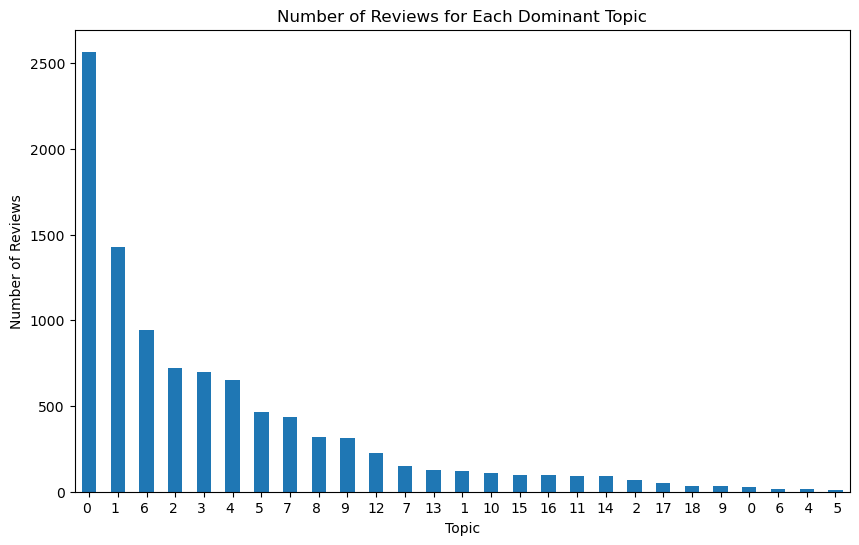

In [50]:
top_3_topics = topics_reviews['Top_3_Topics'].apply(lambda x: x[1:3])
import matplotlib.pyplot as plt

# Count the occurrences of each topic as the dominant topic
dominant_topic_counts = top_3_topics.value_counts()

# Plot the counts
plt.figure(figsize=(10, 6))
dominant_topic_counts.plot(kind='bar')
plt.title('Number of Reviews for Each Dominant Topic')
plt.xlabel('Topic')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0) 
plt.show()

In [51]:
top_3_topics.value_counts()

0     2568
1     1430
6      944
2      725
3      698
4      652
5      468
7      436
8      317
9      313
12     228
 7     153
13     124
 1     119
10     109
15      96
16      95
11      93
14      93
 2      68
17      53
18      35
 9      31
 0      28
 6      13
 4      13
 5       8
Name: Top_3_Topics, dtype: int64